In [2]:
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import data_utils
import pandas as pd
import pickle as pkl

# UCSB DATASET VISUALISATIONS

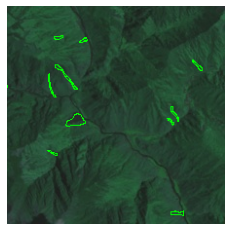

In [37]:
########### UCSB DATASET YOLO ANNOTATION ###########

#Path to Images with COCO Annotation:
ucsb_parent_folder_images = '/Users/vihaan/Workspace/!Datasets/Processed_Data_S24/images/'
ucsb_parent_folder_labels = '/Users/vihaan/Workspace/!Datasets/Processed_Data_S24/labels/'
ucsb_pascal_folder = '/Users/vihaan/Workspace/!Datasets/Processed_Data_S24/data_images/'

# Find an image file from the dataset
ucsb_image_files = os.listdir(ucsb_parent_folder_images)
ucsb_image_files = [f for f in ucsb_image_files if f.endswith('.jpg')]

# Pich a random image file
ucsb_image_file = np.random.choice(ucsb_image_files)
image_file_path = os.path.join(ucsb_parent_folder_images, ucsb_image_file)

# Find the corresponding label file
ucsb_label_file = ucsb_image_file.replace('.jpg', '.txt')
label_file_path = os.path.join(ucsb_parent_folder_labels, ucsb_label_file)

# Use function from data_utils to print label on image
data_utils.print_labels_on_image(image_file_path, label_file_path, format = 'YOLO', task = 'instance_segmentation', jupyter_notebook = True)


In [32]:
# Writing the cell below as a function:
def print_random_images_with_box_annotation(save_folder,save_name_tag,pascal_folder_path,number_of_images = 1,display_image = True,save_image = False):

    # Prepare a list of all image files in the pascal_folder_path:
    image_files = os.listdir(pascal_folder_path)
    image_files = [f for f in image_files if f.endswith('.jpg')]

    # Shuffle it and pick top number_of_images images:
    np.random.shuffle(image_files)
    image_files = image_files[:number_of_images]

    if save_image:
        # Check if save folder exists, if not create it:
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)

    # Iterate through all the images:
    for image_file in image_files:

        # Define image file path:
        image_file_path = os.path.join(pascal_folder_path, image_file)

        # Read the image file:
        image = cv2.imread(image_file_path)

        # Make a copy of the image to display without bounding box:
        image_old = image.copy()

        # get the corresponding xml file:
        label_file = image_file.replace('.jpg', '.xml')

        # Get the label file path:
        label_file_path = os.path.join(pascal_folder_path, label_file)

        # Reading the xml file:
        tree = ET.parse(label_file_path)
        root = tree.getroot()

        # List out all the landslide objects/instances in the image:
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            bbox_values = [int(float(value.text)) for value in bndbox.findall('value')]
            xmin = int(float(bndbox.find('xmin').text))
            ymin = int(float(bndbox.find('ymin').text))
            xmax = int(float(bndbox.find('xmax').text))
            ymax = int(float(bndbox.find('ymax').text))
            bbox_values = [xmin, ymin, xmax, ymax]
            if len(bbox_values) == 4:
                cv2.rectangle(image, (bbox_values[0], bbox_values[1]), (bbox_values[2], bbox_values[3]), (255, 0, 0), 2)
                #cv2.putText(image, name, (bbox_values[0], bbox_values[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        if display_image:
            # display both image_old and image
            plt.figure(figsize=(10, 10))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image_old, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Image with Bounding Box')
            plt.axis('off')
            plt.show()

        if save_image:
            # Prepare the save path for each image:
            save_path = os.path.join(save_folder, save_name_tag + '_' + image_file)

            # Create a figure with a more rectangular shape
            plt.figure(figsize=(20, 10))  # Width is double the height to accommodate two square images side by side

            # Add the first image (Original Image)
            plt.subplot(1, 2, 1)
            # Convert the image and resize it to a fixed size, e.g., 500x500 pixels
            fixed_size = (500, 500)
            resized_image_old = cv2.resize(cv2.cvtColor(image_old, cv2.COLOR_BGR2RGB), fixed_size)
            plt.imshow(resized_image_old)
            plt.title('Original Image')
            plt.axis('off')

            # Add the second image (Image with Bounding Box)
            plt.subplot(1, 2, 2)
            # Similarly, convert and resize this image
            resized_image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), fixed_size)
            plt.imshow(resized_image)
            plt.title('Image with Bounding Box')
            plt.axis('off')

            # Save the image without displaying it
            plt.savefig(save_path)

            # Clear the current figure to free memory and avoid overlapping content in subsequent saves
            plt.clf()
            plt.close()






In [14]:
################# UCSB DATASET PASCAL ANNOTATION #################

# Find the corresponding xml file for ucsb_image_file from the same folder
ucsb_xml_file = ucsb_image_file.replace('.jpg', '.xml')
xml_file_path = os.path.join(ucsb_pascal_folder, ucsb_xml_file)

# Read the image
image = cv2.imread(image_file_path)

# Reading the xml file to print the bounding boxes
tree = ET.parse(xml_file_path)
root = tree.getroot()

# list out all the landslide objects/instances in the image
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    bbox_values = [int(float(value.text)) for value in bndbox.findall('value')]
    xmin = int(float(bndbox.find('xmin').text))
    ymin = int(float(bndbox.find('ymin').text))
    xmax = int(float(bndbox.find('xmax').text))
    ymax = int(float(bndbox.find('ymax').text))
    bbox_values = [xmin, ymin, xmax, ymax]
    if len(bbox_values) == 4:
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()



NameError: name 'ucsb_image_file' is not defined

# L4S Data Visualisation

925.jpg


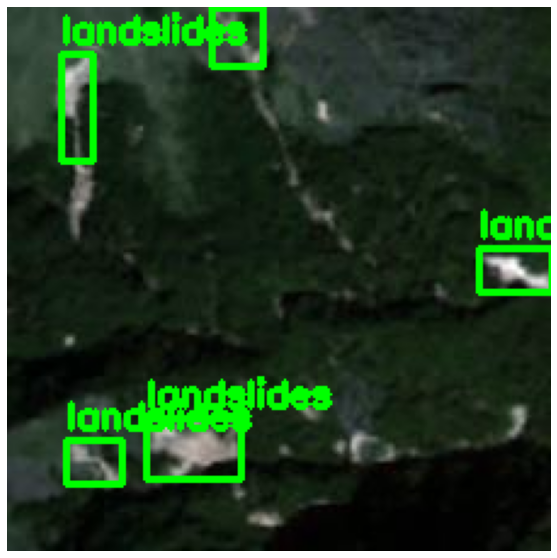

In [42]:
########### L4S PASCAL ANNOTATION ###########

#Path to Images with COCO Annotation:
l4s_pascal_folder = '/Users/vihaan/Workspace/!Datasets/l4s_complete/'

# Find an image file from the dataset
l4s_image_files = os.listdir(l4s_pascal_folder)
l4s_image_files = [f for f in l4s_image_files if f.endswith('.jpg')]

# Pich a random image file
l4s_image_file = np.random.choice(l4s_image_files)
print(l4s_image_file)
image_file_path = os.path.join(l4s_pascal_folder, l4s_image_file)

# Find the corresponding label file
l4s_label_file = l4s_image_file.replace('.jpg', '.xml')
label_file_path = os.path.join(l4s_pascal_folder, l4s_label_file)

# Read the image
image = cv2.imread(image_file_path)

# Reading the xml file to print the bounding boxes
tree = ET.parse(label_file_path)
root = tree.getroot()

# list out all the landslide objects/instances in the image
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    bbox_values = [int(float(value.text)) for value in bndbox.findall('value')]
    xmin = int(float(bndbox.find('xmin').text))
    ymin = int(float(bndbox.find('ymin').text))
    xmax = int(float(bndbox.find('xmax').text))
    ymax = int(float(bndbox.find('ymax').text))
    bbox_values = [xmin, ymin, xmax, ymax]
    if len(bbox_values) == 4:
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# SAR Dataset Visualisation

Mengdong0847.jpg


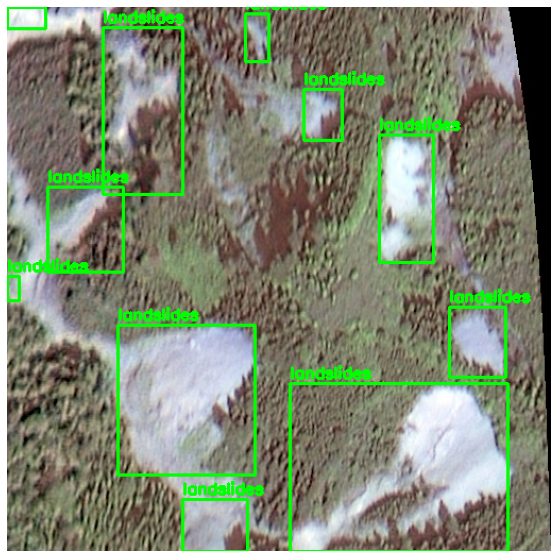

In [48]:


########### CAS PASCAL ANNOTATION ###########

#Path to Images with COCO Annotation:
l4s_pascal_folder = '/Users/vihaan/Workspace/!Datasets/SAR Dataset Processed'

# Find an image file from the dataset
l4s_image_files = os.listdir(l4s_pascal_folder)
l4s_image_files = [f for f in l4s_image_files if f.endswith('.jpg')]

# Pich a random image file
l4s_image_file = np.random.choice(l4s_image_files)
print(l4s_image_file)
image_file_path = os.path.join(l4s_pascal_folder, l4s_image_file)

# Find the corresponding label file
l4s_label_file = l4s_image_file.replace('.jpg', '.xml')
label_file_path = os.path.join(l4s_pascal_folder, l4s_label_file)

# Read the image
image = cv2.imread(image_file_path)

# Reading the xml file to print the bounding boxes
tree = ET.parse(label_file_path)
root = tree.getroot()

# list out all the landslide objects/instances in the image
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    bbox_values = [int(float(value.text)) for value in bndbox.findall('value')]
    xmin = int(float(bndbox.find('xmin').text))
    ymin = int(float(bndbox.find('ymin').text))
    xmax = int(float(bndbox.find('xmax').text))
    ymax = int(float(bndbox.find('ymax').text))
    bbox_values = [xmin, ymin, xmax, ymax]
    if len(bbox_values) == 4:
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Preparing the human feedback excel sheet for visualisation.

In [39]:
# Make a dictionary of all the classes in the dataset

ucsb_pascal = '/Users/vihaan/Workspace/!Datasets/Processed_Data_S24/data_images/'
l4s_pascal = '/Users/vihaan/Workspace/!Datasets/l4s_complete/'
cas_pascal = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed'



In [40]:
# Display just image, and then image with labels annotated on it:


### Preparing the images separately first.

In [66]:
import openpyxl
from openpyxl.drawing.image import Image as OpenpyxlImage
import cv2
from PIL import Image

def save_image_in_index(image_path, index, excel_path):
    # Open the image with OpenCV
    img = cv2.imread(image_path)
    # Convert color from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Save the image temporarily (PIL reads images in RGB format)
    temp_image_path = 'temp_image.png'
    Image.fromarray(img).save(temp_image_path)

    # Load or create Excel workbook
    try:
        wb = openpyxl.load_workbook(excel_path)
    except FileNotFoundError:
        wb = openpyxl.Workbook()
    ws = wb.active

    # Calculate the required column width and row height based on the image size
    original_height, original_width = img.shape[:2]
    # Column width in Excel can be approximated to pixels by dividing by about 7
    column_width = original_width / 7
    # Row height in Excel is more direct with pixels, but often needs a slight increase
    row_height = original_height * 0.75

    # Adjust the column width and row height
    ws.column_dimensions['A'].width = column_width
    ws.row_dimensions[index].height = row_height

    # Create an image object using openpyxl
    img = OpenpyxlImage(temp_image_path)

    # Determine Excel cell to place the image and anchor it
    cell_reference = 'A' + str(index)
    img.anchor = cell_reference
    ws.add_image(img)

    # Save the workbook
    wb.save(excel_path)

    # Optionally remove the temporary image file
    os.remove(temp_image_path)


In [42]:
# Folder to save all these images:
save_folder = './images_on_excel'
os.makedirs(save_folder, exist_ok = True)
num_images_each_dataset = 100

print_random_images_with_box_annotation(save_folder,save_name_tag = 'ucsb',pascal_folder_path=ucsb_pascal,number_of_images = 100,display_image = False,save_image = True)
print_random_images_with_box_annotation(save_folder,save_name_tag = 'l4s',pascal_folder_path=l4s_pascal,number_of_images = 100,display_image = False,save_image = True)
print_random_images_with_box_annotation(save_folder,save_name_tag = 'cas',pascal_folder_path=cas_pascal,number_of_images = 100,display_image = False,save_image = True)

In [43]:
# Checking total number of images in the folder:
image_files = os.listdir(save_folder)
image_files = [f for f in image_files if f.endswith('.jpg')]
print(len(image_files))

300


In [73]:
# Make a dictionary that holds the images (tag of each image) and a corresponding index number (between 1 and 300)
list_of_ucsb_images = [f for f in image_files if 'ucsb' in f]
list_of_l4s_images = [f for f in image_files if 'l4s' in f]
list_of_cas_images = [f for f in image_files if 'cas' in f]

# List of numbers from 1 to 300 shuffled.
index_numbers = np.arange(1,301)

# Shuffle the index numbers
np.random.shuffle(index_numbers)

# Make a dictionary that maps from tag to a random list of 100 numbers.
full_dict = {}
full_dict['ucsb'] = index_numbers[:100]
full_dict['l4s'] = index_numbers[100:200]
full_dict['cas'] = index_numbers[200:]

# Save the dictionary as a pickle file
import pickle
pickle.dump(full_dict, open('full_dict.pkl', 'wb'))

print(sorted(full_dict['ucsb']))

# picking out an image from the list:
for i in range(len(list_of_ucsb_images)):
    entry = i
    image_path = os.path.join(save_folder, list_of_ucsb_images[entry])
    index = full_dict['ucsb'][entry]

    # Save the image in the excel file:
    excel_path = 'images_on_excel.xlsx'

    # Check if excel exists, if not create it:
    if not os.path.exists(excel_path):
        wb = openpyxl.Workbook()
        wb.save(excel_path)

    save_image_in_index(image_path, index, excel_path)



[2, 5, 6, 7, 9, 10, 17, 24, 25, 42, 48, 51, 52, 64, 65, 66, 68, 69, 72, 73, 77, 79, 80, 81, 82, 84, 89, 91, 95, 96, 98, 99, 100, 104, 105, 107, 110, 111, 113, 115, 116, 117, 121, 124, 128, 133, 134, 137, 138, 141, 142, 146, 148, 149, 156, 158, 162, 166, 170, 172, 173, 174, 175, 177, 181, 182, 183, 187, 191, 193, 204, 205, 207, 209, 210, 214, 215, 223, 227, 229, 240, 241, 247, 254, 256, 258, 261, 263, 265, 268, 269, 274, 280, 286, 288, 289, 290, 292, 293, 294]


In [74]:
print(sorted(full_dict['l4s']))



for i in range(len(list_of_l4s_images)):
    entry = i
    image_path = os.path.join(save_folder, list_of_l4s_images[entry])
    index = full_dict['l4s'][entry]

    # Save the image in the excel file:
    excel_path = 'images_on_excel.xlsx'

    save_image_in_index(image_path, index, excel_path)




[3, 4, 8, 11, 12, 13, 14, 15, 16, 22, 26, 32, 33, 35, 41, 43, 49, 55, 56, 59, 60, 61, 62, 63, 70, 74, 75, 85, 86, 97, 101, 102, 112, 114, 118, 119, 120, 122, 126, 129, 130, 131, 132, 135, 136, 139, 140, 143, 144, 145, 147, 152, 153, 155, 157, 159, 160, 168, 169, 176, 184, 188, 189, 190, 195, 198, 201, 202, 203, 212, 216, 222, 225, 226, 228, 234, 237, 238, 244, 245, 246, 248, 250, 252, 255, 259, 260, 262, 264, 267, 270, 272, 277, 278, 281, 283, 291, 295, 297, 298]


In [75]:
print(sorted(full_dict['cas']))

for i in range(len(list_of_cas_images)):
    entry = i
    image_path = os.path.join(save_folder, list_of_cas_images[entry])
    index = full_dict['cas'][entry]

    # Save the image in the excel file:
    excel_path = 'images_on_excel.xlsx'

    save_image_in_index(image_path, index, excel_path)

[1, 18, 19, 20, 21, 23, 27, 28, 29, 30, 31, 34, 36, 37, 38, 39, 40, 44, 45, 46, 47, 50, 53, 54, 57, 58, 67, 71, 76, 78, 83, 87, 88, 90, 92, 93, 94, 103, 106, 108, 109, 123, 125, 127, 150, 151, 154, 161, 163, 164, 165, 167, 171, 178, 179, 180, 185, 186, 192, 194, 196, 197, 199, 200, 206, 208, 211, 213, 217, 218, 219, 220, 221, 224, 230, 231, 232, 233, 235, 236, 239, 242, 243, 249, 251, 253, 257, 266, 271, 273, 275, 276, 279, 282, 284, 285, 287, 296, 299, 300]


# Getting Evaluation scores from experts

In [4]:
# expert notebooks:

gen_excel_path = 'Gen_images_on_excel.xlsx'
amanda_excel_path = 'Amanda_images_on_excel.xlsx'
elizabeth_excel_path = 'Elizabeth_images_on_excel.xlsx'

# Reading the full_dict.pkl file:
full_dict = pkl.load(open('full_dict.pkl', 'rb'))

def calculate_average_from_excel(file_path, indices):

    print(len(indices))

    # Read the Excel file
    df = pd.read_excel(file_path, header=None)
    
    # Ensure the indices are valid and within the range of the dataframe
    valid_indices = [i - 1 for i in indices if i < len(df)]
    
    # Extract the values from the second column (column B) for the given indices
    values = df.iloc[valid_indices, 1].values  # 1 is the index for the second column
    
    # Calculate and return the average of the extracted values
    if len(values) > 0:
        average = sum(values) / len(values)
        return average
    else:
        return None
    
# Calculate the average for each dataset
ucsb_average = calculate_average_from_excel(gen_excel_path, full_dict['ucsb'])
print('gen ucsb average',ucsb_average)
l4s_average = calculate_average_from_excel(gen_excel_path, full_dict['l4s'])
print('gen l4s average',l4s_average)
cas_average = calculate_average_from_excel(gen_excel_path, full_dict['cas'])
print('gen cas average',cas_average)

ucsb_average = calculate_average_from_excel(amanda_excel_path, full_dict['ucsb'])
print('amanda ucsb average',ucsb_average)
l4s_average = calculate_average_from_excel(amanda_excel_path, full_dict['l4s'])
print('amanda l4s average',l4s_average)
cas_average = calculate_average_from_excel(amanda_excel_path, full_dict['cas'])
print('amanda cas average',cas_average)

ucsb_average = calculate_average_from_excel(elizabeth_excel_path, full_dict['ucsb'])
print('elizabeth ucsb average',ucsb_average)
l4s_average = calculate_average_from_excel(elizabeth_excel_path, full_dict['l4s'])
print('elizabeth l4s average',l4s_average)
cas_average = calculate_average_from_excel(elizabeth_excel_path, full_dict['cas'])
print('elizabeth cas average',cas_average)




100
gen ucsb average 2.0
100
gen l4s average 6.9
100
gen cas average 5.616161616161616
100
amanda ucsb average 1.81
100
amanda l4s average 8.39
100
amanda cas average 7.606060606060606
100
elizabeth ucsb average 1.12
100
elizabeth l4s average 4.78
100
elizabeth cas average 6.03030303030303


In [10]:
print(sorted(full_dict['ucsb']))

[2, 5, 6, 7, 9, 10, 17, 24, 25, 42, 48, 51, 52, 64, 65, 66, 68, 69, 72, 73, 77, 79, 80, 81, 82, 84, 89, 91, 95, 96, 98, 99, 100, 104, 105, 107, 110, 111, 113, 115, 116, 117, 121, 124, 128, 133, 134, 137, 138, 141, 142, 146, 148, 149, 156, 158, 162, 166, 170, 172, 173, 174, 175, 177, 181, 182, 183, 187, 191, 193, 204, 205, 207, 209, 210, 214, 215, 223, 227, 229, 240, 241, 247, 254, 256, 258, 261, 263, 265, 268, 269, 274, 280, 286, 288, 289, 290, 292, 293, 294]


In [34]:
# Reading the excel file:
df = pd.read_excel(gen_excel_path, header=None)
print(df)



      0  1
0   NaN  3
1   NaN  1
2   NaN  8
3   NaN  7
4   NaN  2
..   .. ..
295 NaN  6
296 NaN  6
297 NaN  7
298 NaN  8
299 NaN  8

[300 rows x 2 columns]


In [28]:
# Check the entry column:
valid_indices = [i for i in full_dict['ucsb'] if i < len(df)]
values = df.iloc[sorted(valid_indices), 1].values

print(sorted(valid_indices))
print(values)

8


In [33]:
print(df.iloc[0, 1])

1
